In [348]:
#import all relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import missingno as msno # library to examine missing values
### To ignore warnings
import warnings 
warnings.filterwarnings('ignore')
  

### Machine Learning libraries
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [349]:
#to get data
df = pd.read_excel('BA_Assignment_Part_1_dataset.xlsx', sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [350]:
df.info() #to get info about fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [351]:
df.isnull().sum()/len(df)*100 #percentage of null value in our data.

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [5]:
df.describe(include = 'all') # detailed info about data including mean,mode, median,sd.

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


In [6]:
df.skew() #check skewness of the data 

CustomerID                     0.000000
Churn                          1.772843
Tenure                         0.736513
CityTier                       0.735326
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                1.088639
Complain                       0.953347
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
CashbackAmount                 1.149846
dtype: float64

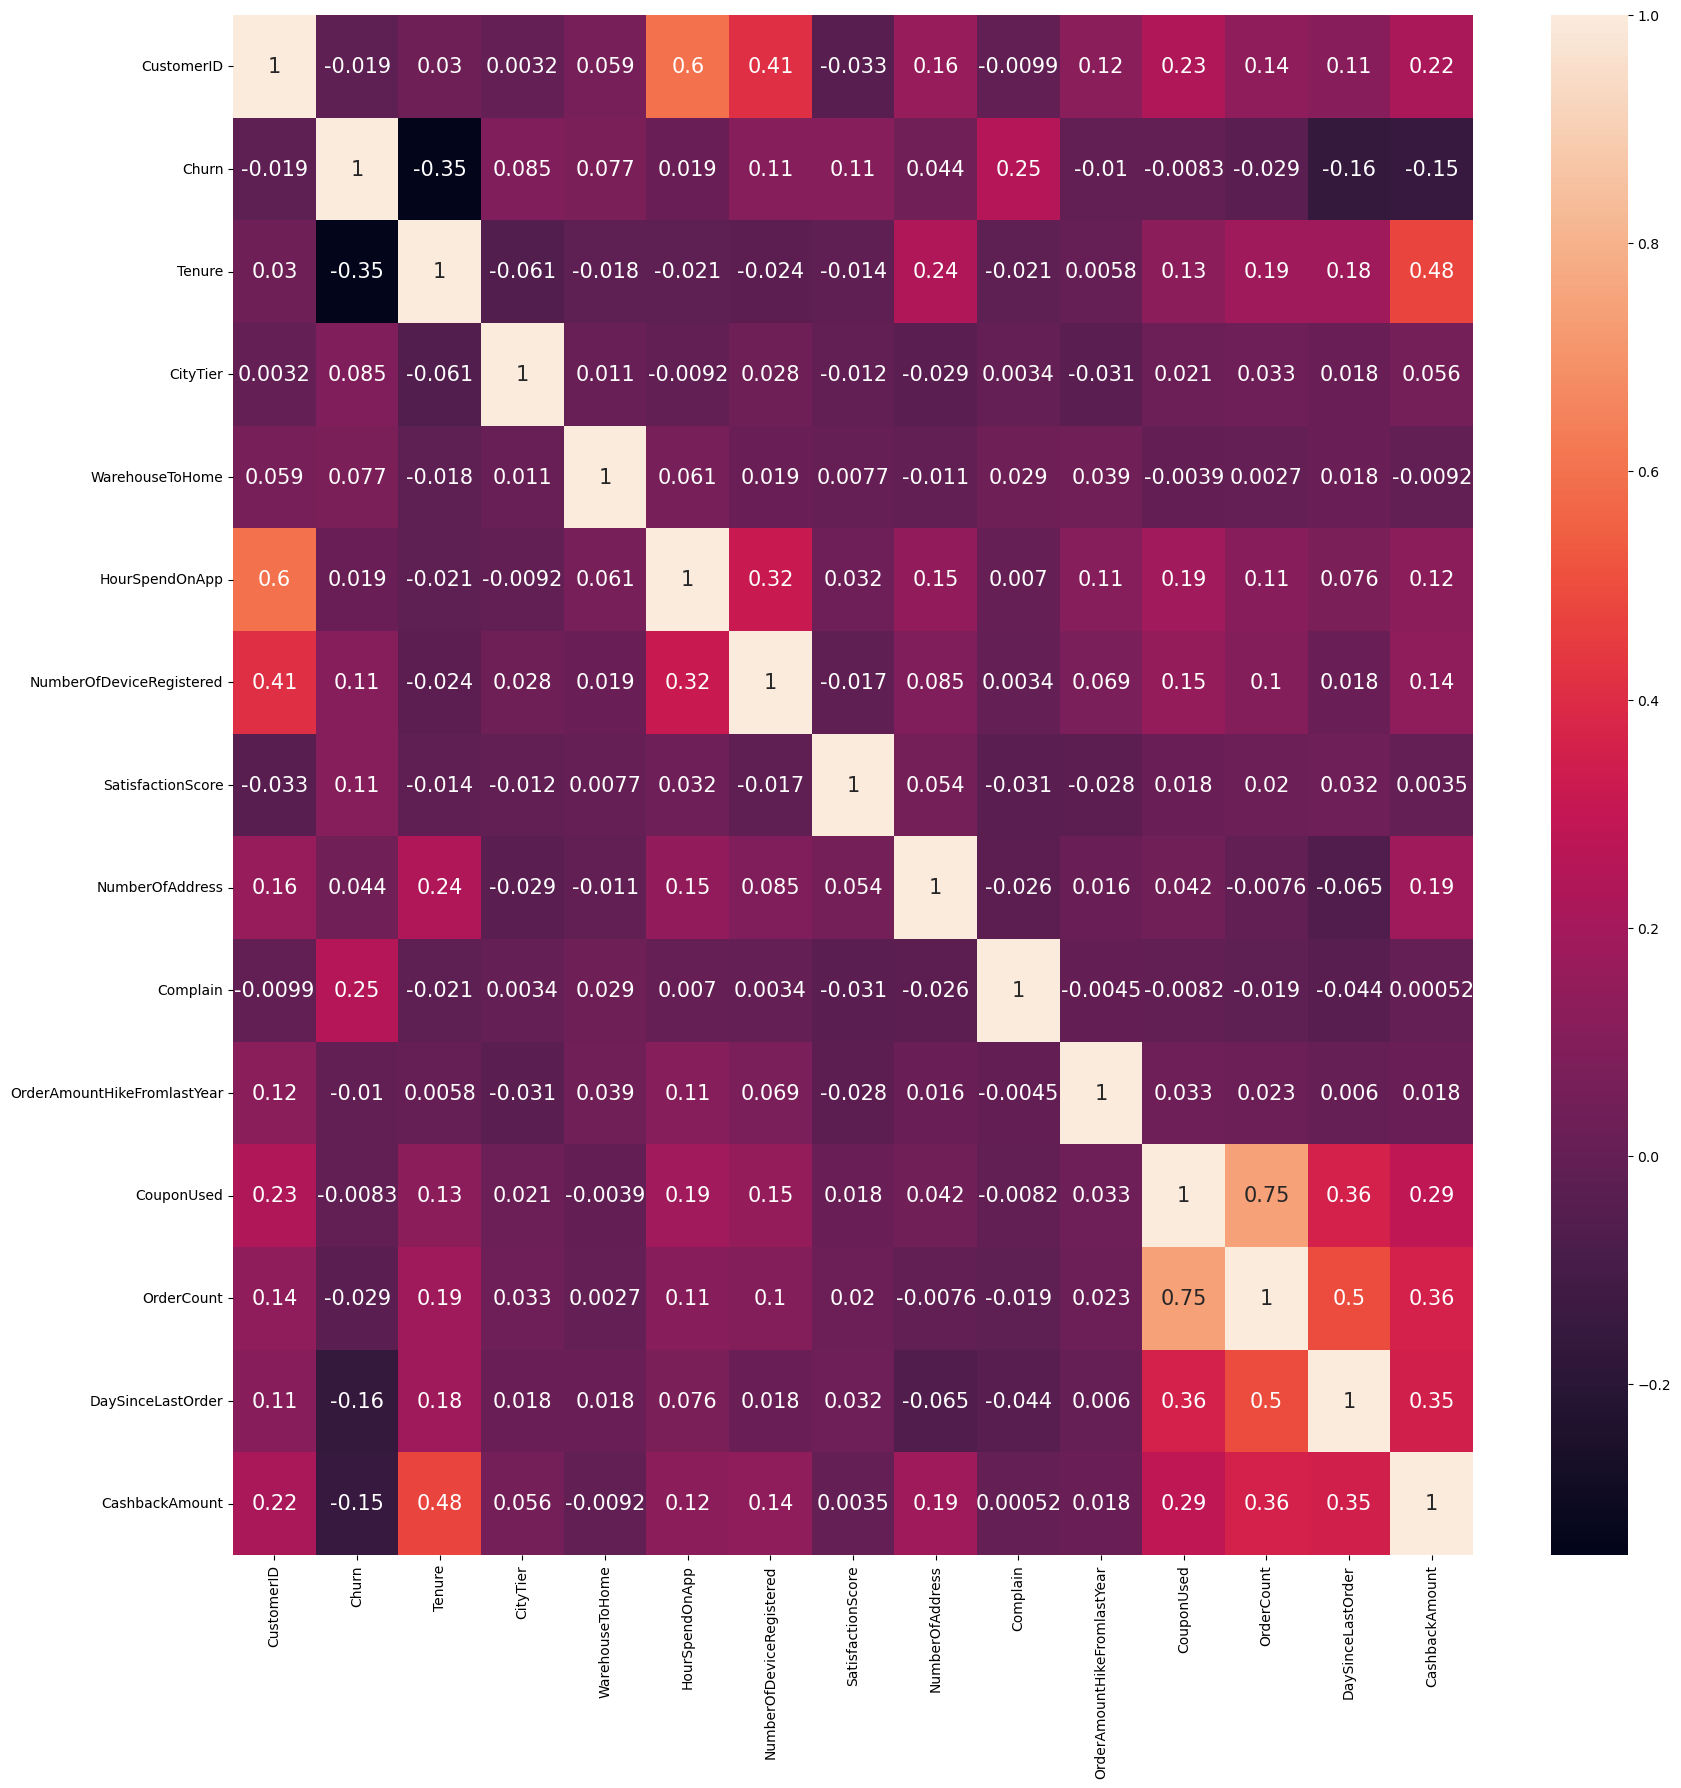

In [7]:
# Calculate the correlation matrix
ht = df.corr()

# Create a larger figure
plt.figure(figsize=(20, 20))
# Create the heatmap
sns.heatmap(ht, fmt=".2g", annot=True, annot_kws = {'size':15}, xticklabels= 1, yticklabels= 1)

# Show the plot
plt.show()


# Treatment of Null values

<Axes: >

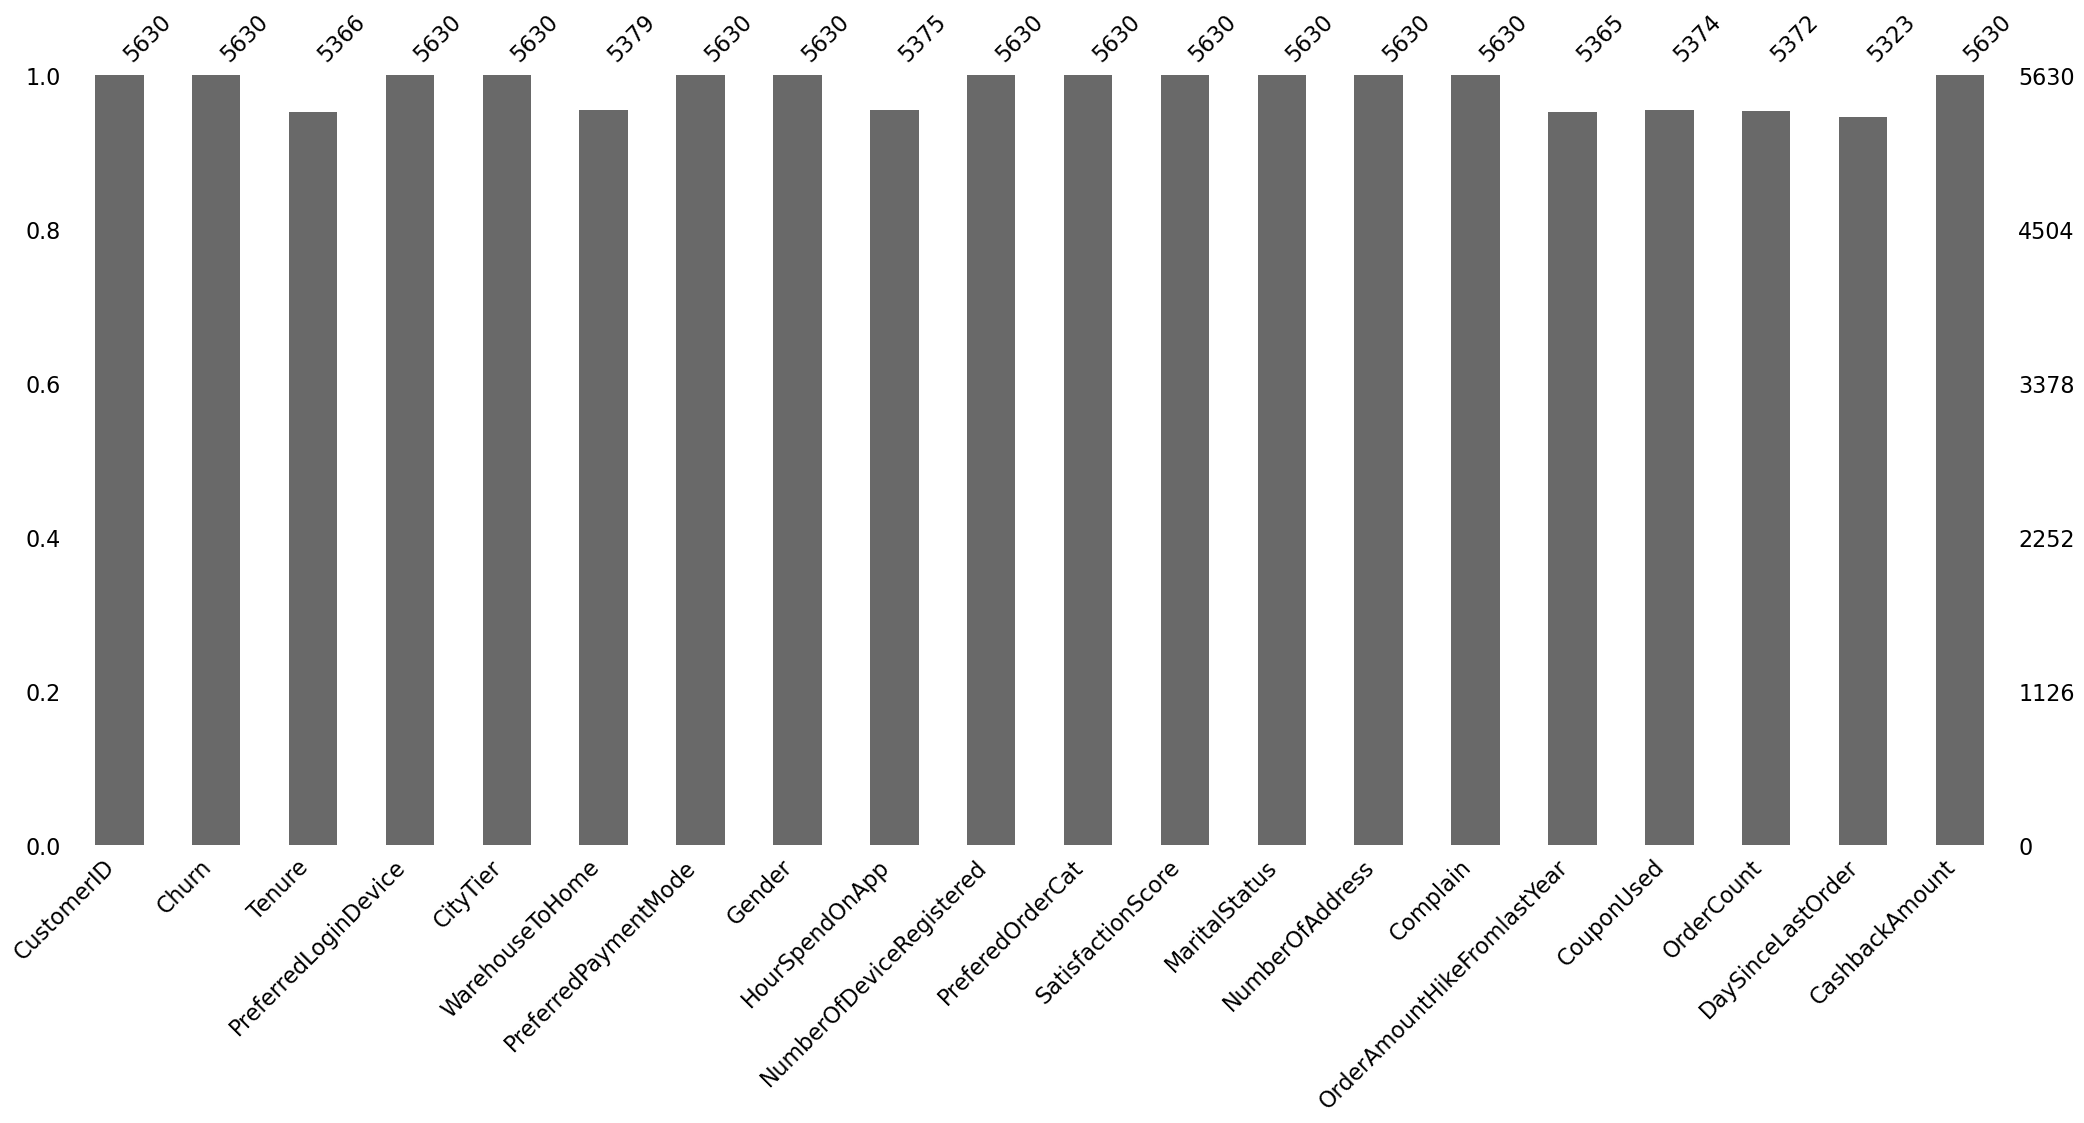

In [8]:
msno.bar(df) # showing missing values

<Axes: >

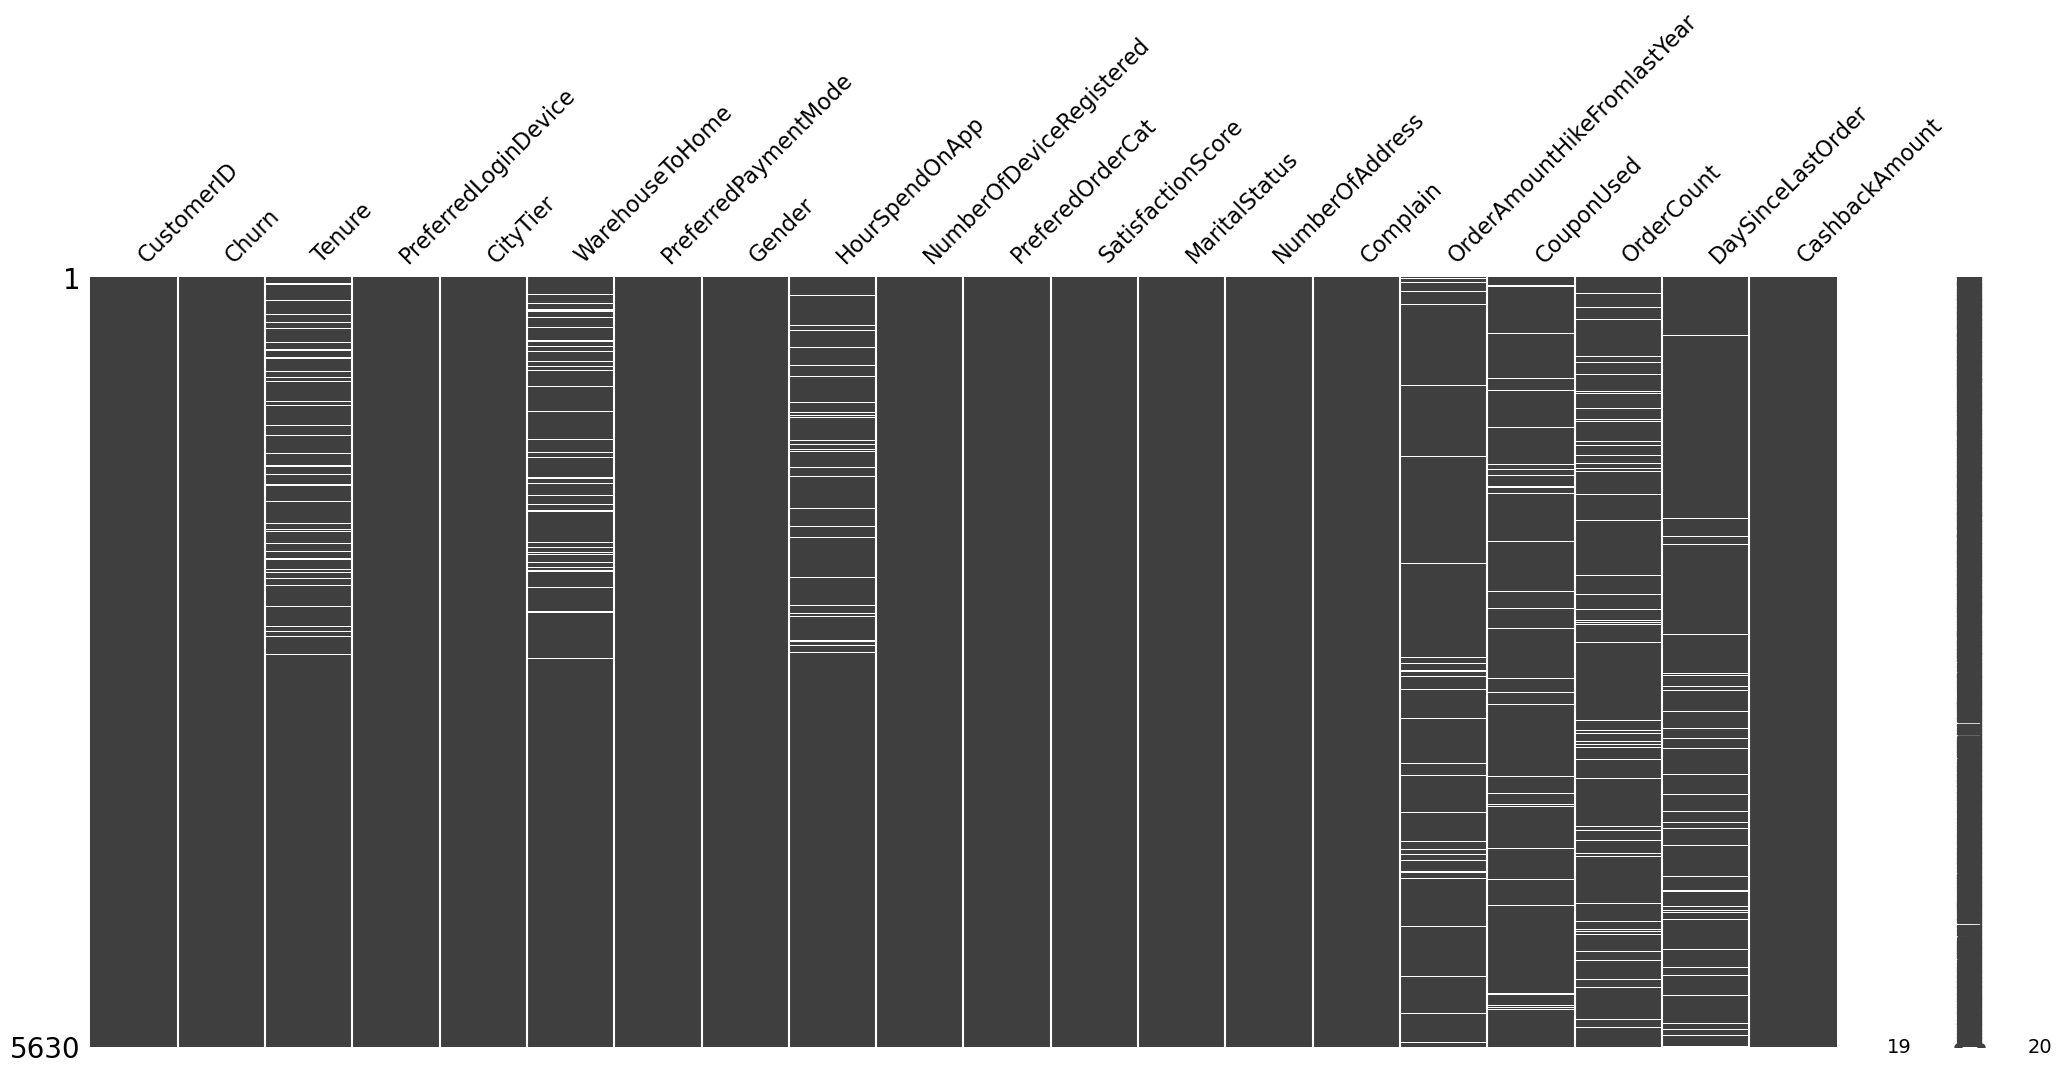

In [9]:
msno.matrix(df) #pattern of missing values

In [10]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [11]:
df.isnull().sum() # see null values

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

<Axes: >

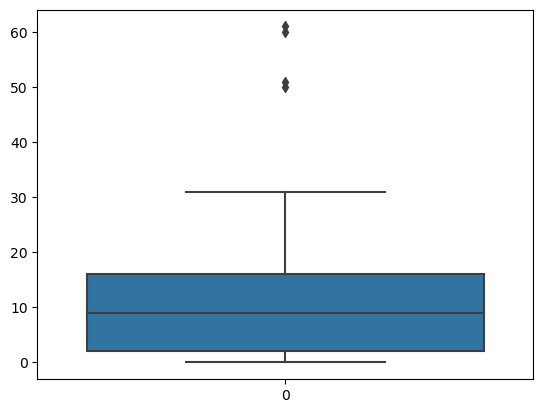

In [12]:
sns.boxplot(df["Tenure"]) #display outlier of tenure for null value treatment

In [352]:
tenure_median = df["Tenure"].median() #as tenure have outliers we have considered median to fill null values
df["Tenure"].fillna(tenure_median,inplace = True)

<Axes: >

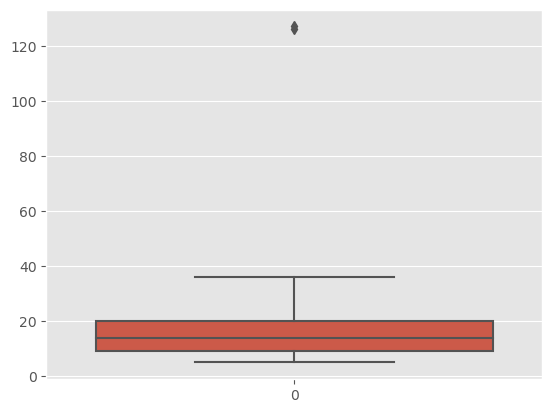

In [356]:
sns.boxplot(df["WarehouseToHome"]) #display outlier of tenure for null value treatment

In [357]:
WarehouseToHome_median = df["WarehouseToHome"].median() #as warehousetohome have outliers we have considered median to fill null values
df["WarehouseToHome"].fillna(WarehouseToHome_median,inplace = True)

In [358]:
df["WarehouseToHome"].isnull().sum()

0

<Axes: >

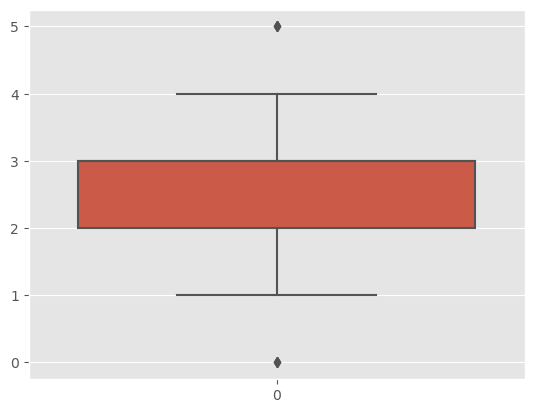

In [360]:
sns.boxplot(df["HourSpendOnApp"])

In [361]:
HourSpendOnApp_median = df["HourSpendOnApp"].median() #as hourspendonapp have outliers we have considered median to fill null values
df["HourSpendOnApp"].fillna(HourSpendOnApp_median,inplace = True)

In [362]:
df["HourSpendOnApp"].isnull().sum()

0

<Axes: >

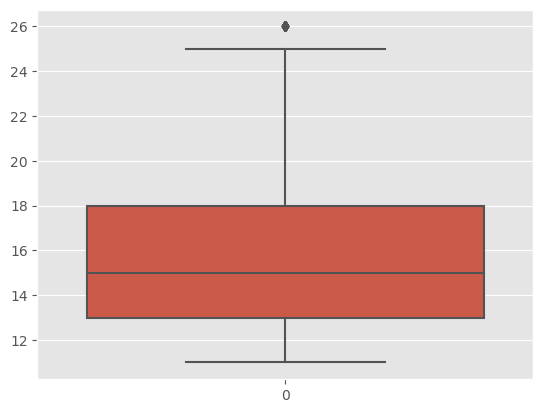

In [363]:
sns.boxplot(df["OrderAmountHikeFromlastYear"])

In [364]:
OrderAmountHikeFromlastYear_median=df["OrderAmountHikeFromlastYear"].median() #as orderamounthikefromlastyear have outliers we have considered median to fill null values

df["OrderAmountHikeFromlastYear"].fillna(OrderAmountHikeFromlastYear_median,inplace = True)

In [365]:
df["OrderAmountHikeFromlastYear"].isnull().sum()

0

<Axes: >

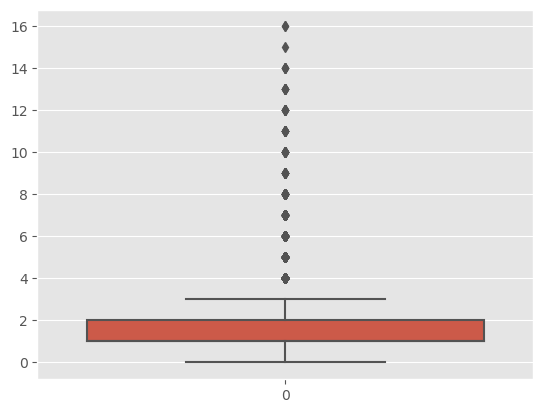

In [366]:
sns.boxplot(df["CouponUsed"])

In [367]:
CouponUsed_median=df["CouponUsed"].median()
df["CouponUsed"].fillna(CouponUsed_median, inplace = True)

In [368]:
df["CouponUsed"].isnull().sum()

0

<Axes: >

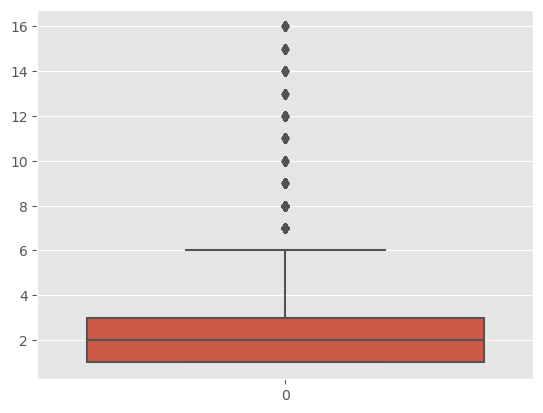

In [369]:
sns.boxplot(df["OrderCount"])

In [370]:
OrderCount_median=df["OrderCount"].median()
df["OrderCount"].fillna(OrderCount_median, inplace = True)

In [371]:
df["OrderCount"].isnull().sum()

0

<Axes: >

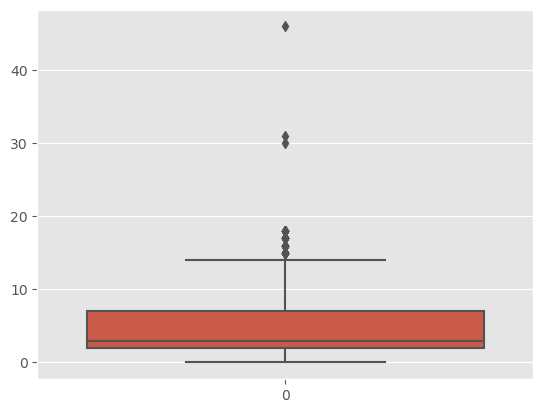

In [372]:
sns.boxplot(df["DaySinceLastOrder"])

In [373]:
DaySinceLastOrder_median=df["DaySinceLastOrder"].median()
df["DaySinceLastOrder"].fillna(DaySinceLastOrder_median,inplace= True)

In [374]:
df.info() # to get this info shows us we dont have any null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

<Axes: xlabel='CashbackAmount', ylabel='Density'>

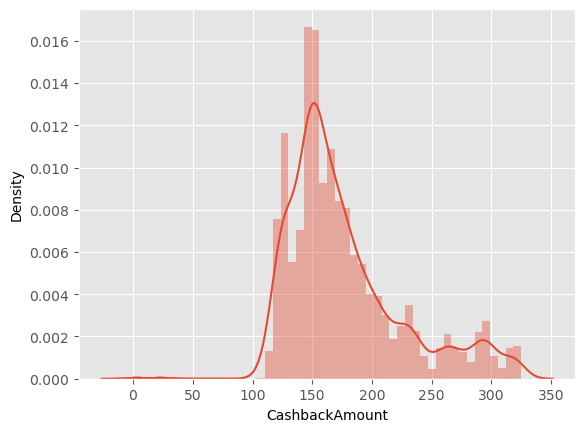

In [375]:
sns.distplot(df["CashbackAmount"]) # visualize cashbackamount for normalisation purpose to get a rough idea about cashbackamoun

# Treatment of Outliers

<Axes: >

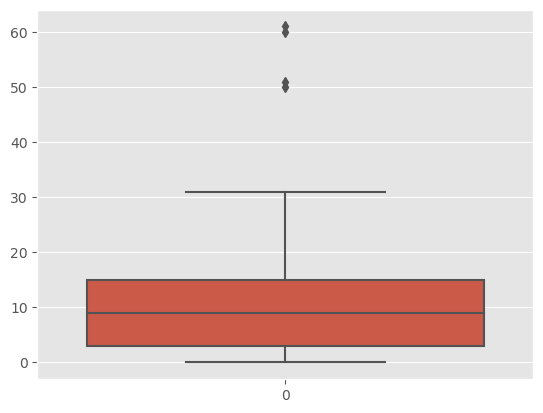

In [377]:
sns.boxplot(df['Tenure']) # to get undertanding about outliers

In [378]:
df["Tenure"].value_counts() #value count of Tenure

1.0     690
9.0     511
0.0     508
8.0     263
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

In [379]:
Q1 = np.percentile(df["Tenure"], 25)
Q2 = np.percentile(df["Tenure"], 50)  
Q3 = np.percentile(df["Tenure"], 75)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier =[]
for x in df["Tenure"]:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 12.0
low_limit is -15.0
up_limit is 33.0
 outlier in the dataset is [50.0, 60.0, 51.0, 61.0]


In [381]:
mean_tenure = round(df["Tenure"].mean(),0)
df["Tenure"]=df["Tenure"].replace([50.0,60.0,51.0,61.0],mean_tenure) #replace outlier with mean

<Axes: >

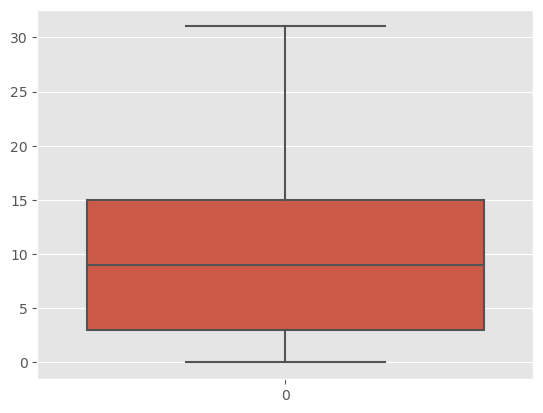

In [382]:
sns.boxplot(df["Tenure"])

<Axes: >

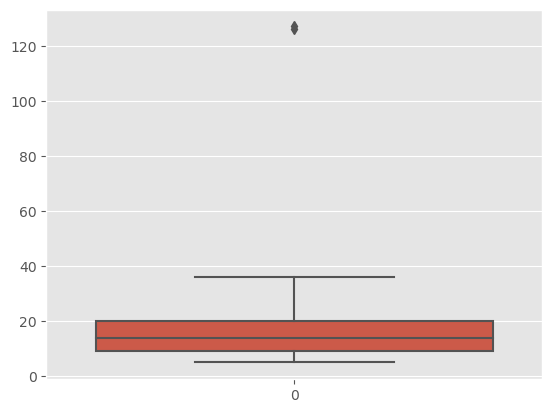

In [384]:
sns.boxplot(df["WarehouseToHome"]) #visualise outlier in warehousetohome

In [386]:
df["WarehouseToHome"].value_counts() #value count of warehousetohome

9.0      559
14.0     550
8.0      444
7.0      389
16.0     322
6.0      295
15.0     288
10.0     274
13.0     249
11.0     233
12.0     221
17.0     217
22.0     104
31.0     101
23.0      96
30.0      94
32.0      94
35.0      93
18.0      89
26.0      89
25.0      86
21.0      85
24.0      85
27.0      81
29.0      81
19.0      75
20.0      74
28.0      71
33.0      67
34.0      63
36.0      51
5.0        8
126.0      1
127.0      1
Name: WarehouseToHome, dtype: int64

In [387]:
Q1 = np.percentile(df["WarehouseToHome"], 25)
Q2 = np.percentile(df["WarehouseToHome"], 50)  
Q3 = np.percentile(df["WarehouseToHome"], 75)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier =[]
for x in df["WarehouseToHome"]:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 11.0
low_limit is -7.5
up_limit is 36.5
 outlier in the dataset is [126.0, 127.0]


In [390]:
mean_warehousetohome = round(df["WarehouseToHome"].mean(),0)
df["WarehouseToHome"]=df["WarehouseToHome"].replace([126.0,127.0],mean_warehousetohome)  #replace outlier with mean

<Axes: >

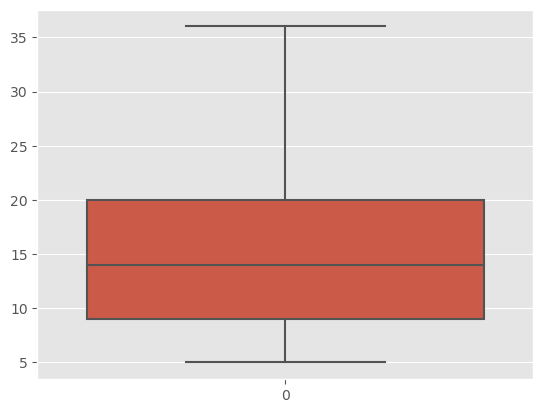

In [391]:
sns.boxplot(df["WarehouseToHome"])

<Axes: >

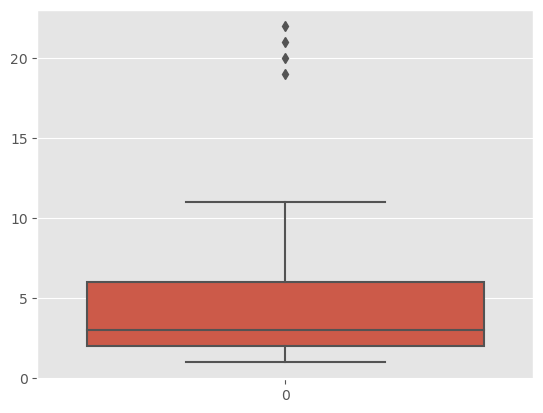

In [392]:
sns.boxplot(df["NumberOfAddress"])

In [393]:
df['NumberOfAddress'].value_counts() # value count of Number of Address

2     1369
3     1278
4      588
5      571
6      382
1      371
8      280
7      256
9      239
10     194
11      98
19       1
21       1
20       1
22       1
Name: NumberOfAddress, dtype: int64

In [394]:
Q1 = np.percentile(df['NumberOfAddress'], 25)
Q2 = np.percentile(df['NumberOfAddress'], 50)  
Q3 = np.percentile(df['NumberOfAddress'], 75)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier =[]
for x in df['NumberOfAddress']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 4.0
low_limit is -4.0
up_limit is 12.0
 outlier in the dataset is [19, 21, 20, 22]


In [395]:
 df['NumberOfAddress'] = df['NumberOfAddress'].replace(outlier,int(df['NumberOfAddress'].mode())) #replace outlier with mode

<Axes: >

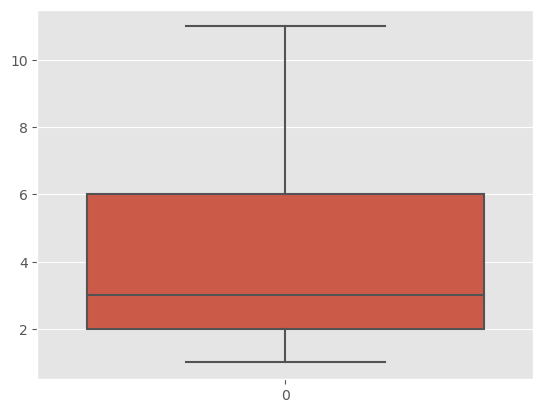

In [396]:
sns.boxplot( df['NumberOfAddress'])

<Axes: >

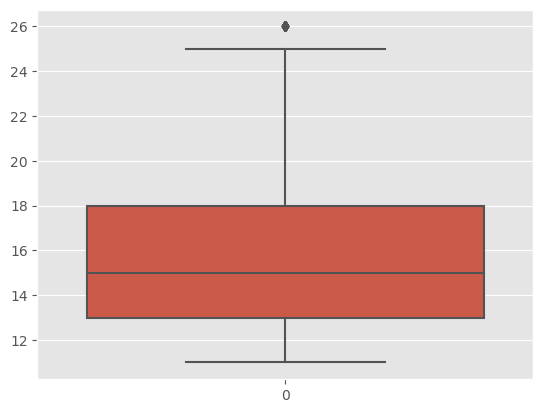

In [397]:
sns.boxplot(df["OrderAmountHikeFromlastYear"])

In [398]:
df["OrderAmountHikeFromlastYear"].value_counts() #value count of order Amount hike from last year. 

15.0    807
14.0    750
13.0    741
12.0    728
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

In [399]:
Q1 = np.percentile(df["OrderAmountHikeFromlastYear"], 25)
Q2 = np.percentile(df["OrderAmountHikeFromlastYear"], 50)  
Q3 = np.percentile(df["OrderAmountHikeFromlastYear"], 75)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier =[]
for x in df["OrderAmountHikeFromlastYear"]:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 5.0
low_limit is 5.5
up_limit is 25.5
 outlier in the dataset is [26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0]


In [403]:
Mean_OA = df["OrderAmountHikeFromlastYear"].mean()
df["OrderAmountHikeFromlastYear"]= df["OrderAmountHikeFromlastYear"].replace(26,Mean_OA) #repace outliers with mean

<Axes: >

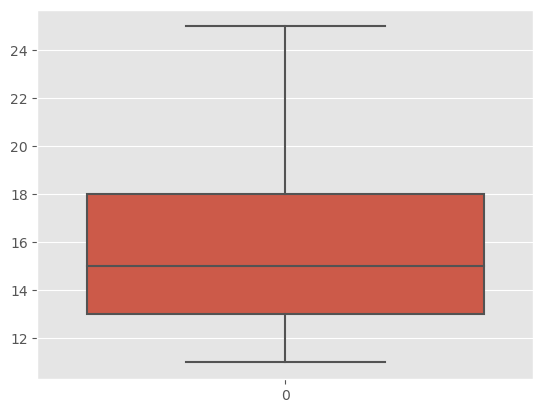

In [405]:
sns.boxplot(df["OrderAmountHikeFromlastYear"])

# Treatment of Categorical variable 

### We have treated categorical variable with the help of dummy encoding

In [406]:
import pandas as pd


# Perform dummy encoding
dummy_df = pd.get_dummies(df, prefix='Category')

# Concatenate original DataFrame with dummy variables
dfc = pd.concat([df, dummy_df], axis=1)

# Drop the original categorical column
dfc.drop(['PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
, axis=1, inplace=True)

dfc

,CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Category_Male,Category_Fashion,Category_Grocery,Category_Laptop & Accessory,Category_Mobile,Category_Mobile Phone,Category_Others,Category_Divorced,Category_Married,Category_Single
0,50001,1,4.0,6.0,3.0,3,2,9,1,11.0,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,9.0,8.0,3.0,4,3,7,1,15.0,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,9.0,30.0,2.0,4,3,6,1,14.0,...,1,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,15.0,2.0,4,5,8,0,23.0,...,1,0,0,1,0,0,0,0,0,1
4,50005,1,0.0,12.0,3.0,3,5,3,0,11.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,30.0,3.0,2,1,6,0,18.0,...,1,0,0,1,0,0,0,0,1,0
5626,55627,0,13.0,13.0,3.0,5,5,6,0,16.0,...,1,1,0,0,0,0,0,0,1,0
5627,55628,0,1.0,11.0,3.0,2,4,3,1,21.0,...,1,0,0,1,0,0,0,0,1,0
5628,55629,0,23.0,9.0,4.0,5,4,4,0,15.0,...,1,0,0,1,0,0,0,0,1,0


In [407]:
dfc.columns # check columns of dfc, we have new dataframe with the name of dfc

Index(['CustomerID', 'Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'CustomerID', 'Churn', 'Tenure',
       'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Category_Computer',
       'Category_Mobile Phone', 'Category_Phone', 'Category_CC',
       'Category_COD', 'Category_Cash on Delivery', 'Category_Credit Card',
       'Category_Debit Card', 'Category_E wallet', 'Category_UPI',
       'Category_Female', 'Category_Male', 'Category_Fashion',
       'Category_Grocery', 'Category_Laptop & Accessory', 'Category_Mobile',
       'Category_Mobile Phone', 'Category_Others', 'Category_Divorced',
       

# Data Understanding 

Customer churn dataset has categorical and non categorical fields.
Non-categorical fields further divided into two part:
    1. High P-value
    2. low P-value

After hypothesis testing, we have divided non categorical fields into two part:

    - Part 1 belong to those fields where P-value is greater than alpha, whereas 
    - Part 2 belong to those fields where P-valus is less than alpha.
    
further, we have divided our data into three cases:

 - case1 has all data excluding to categorical fields. (Meaning combination of Part 1 and Part 2, but not categorical fields)
 - case2 has combination of part 1 and categorical fields. (Meaning Part 1 + categorical fields)
 - case3 has full dataset. (Meaning Part 1 + Part 2 + categorical  )

In [409]:
case1y = dfc.iloc[:,1]
case1y

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

In [61]:
#x = dfc.iloc[:,2:]
#x

In [410]:
case1x=dfc.iloc[:,2:14]
case1x

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
1,9.0,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
2,9.0,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28
3,0.0,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07
4,0.0,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,13.0,13.0,3.0,5,5,6,0,16.0,1.0,2.0,3.0,224.91
5627,1.0,11.0,3.0,2,4,3,1,21.0,1.0,2.0,4.0,186.42
5628,23.0,9.0,4.0,5,4,4,0,15.0,2.0,2.0,9.0,178.90


In [412]:
case3= dfc.iloc[:,14:]
case3

,CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Category_Male,Category_Fashion,Category_Grocery,Category_Laptop & Accessory,Category_Mobile,Category_Mobile Phone,Category_Others,Category_Divorced,Category_Married,Category_Single
0,50001,1,4.0,6.0,3.0,3,2,9,1,11.0,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,9.0,8.0,3.0,4,3,7,1,15.0,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,9.0,30.0,2.0,4,3,6,1,14.0,...,1,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,15.0,2.0,4,5,8,0,23.0,...,1,0,0,1,0,0,0,0,0,1
4,50005,1,0.0,12.0,3.0,3,5,3,0,11.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,30.0,3.0,2,1,6,0,18.0,...,1,0,0,1,0,0,0,0,1,0
5626,55627,0,13.0,13.0,3.0,5,5,6,0,16.0,...,1,1,0,0,0,0,0,0,1,0
5627,55628,0,1.0,11.0,3.0,2,4,3,1,21.0,...,1,0,0,1,0,0,0,0,1,0
5628,55629,0,23.0,9.0,4.0,5,4,4,0,15.0,...,1,0,0,1,0,0,0,0,1,0


In [413]:
#Again check P-value for hypothesis test

import statsmodels.api as sm
import pandas as pd


# Check the data types of X and Y
print("Data types of X:\n", case1x.dtypes)
print("Data types of Y:\n", case1y.dtypes)


# Adding a constant column
X_1 = sm.add_constant(case1x)

# Fit the model
model = sm.OLS(case1y, X_1).fit()

# Print model summary
print(model.summary())


Data types of X:
 Tenure                         float64
WarehouseToHome                float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
SatisfactionScore                int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object
Data types of Y:
 int64
                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.73e-303
Time:                        19:01:43   Log-Likelihood:                -1728.3
No

# We are testing 'case 1' with our machine learning models

## DataSplit 
#### Split the data into two part 
- Train (80%)
- Test  (20%)

In [415]:
X_train,X_test,Y_train,Y_test = train_test_split(case1x,case1y, test_size = 0.2, random_state = 10)

In [416]:
X_train

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
877,8.0,24.0,2.0,3,2,3,0,11.0,0.0,2.0,2.0,193.62
2656,9.0,20.0,2.0,3,3,2,0,16.0,1.0,1.0,0.0,115.14
2598,6.0,8.0,3.0,3,4,9,0,15.0,1.0,1.0,7.0,151.47
1496,8.0,6.0,3.0,3,4,2,0,13.0,0.0,1.0,6.0,172.95
2478,16.0,33.0,2.0,1,4,6,0,12.0,1.0,1.0,2.0,148.76
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,27.0,13.0,3.0,3,1,5,0,15.0,1.0,1.0,7.0,168.54
3441,24.0,7.0,4.0,4,3,2,0,13.0,2.0,2.0,14.0,188.47
1344,7.0,14.0,2.0,1,3,3,0,12.0,0.0,1.0,2.0,144.04
4623,1.0,31.0,4.0,6,1,3,1,19.0,1.0,2.0,1.0,148.40


In [418]:
X_test

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1906,25.0,9.0,2.0,4,5,2,0,11.0,1.0,1.0,16.0,268.56
5318,11.0,26.0,3.0,4,3,5,0,18.0,1.0,2.0,3.0,182.68
4397,26.0,9.0,4.0,5,3,3,1,15.0,2.0,16.0,13.0,315.68
4301,19.0,36.0,3.0,4,1,7,0,14.0,2.0,2.0,4.0,159.52
4141,12.0,17.0,4.0,4,1,3,0,12.0,1.0,2.0,10.0,178.43
...,...,...,...,...,...,...,...,...,...,...,...,...
1750,0.0,9.0,3.0,3,5,6,0,13.0,1.0,1.0,2.0,140.31
494,6.0,6.0,2.0,1,5,2,0,22.0,0.0,1.0,8.0,140.37
3905,9.0,9.0,4.0,5,1,2,1,15.0,2.0,2.0,5.0,174.30
5458,10.0,28.0,4.0,4,4,6,0,23.0,4.0,4.0,3.0,214.26


In [419]:
Y_train

877     0
2656    0
2598    0
1496    0
2478    0
       ..
1180    0
3441    0
1344    0
4623    1
1289    0
Name: Churn, Length: 4504, dtype: int64

In [420]:
Y_test 

1906    0
5318    0
4397    0
4301    0
4141    0
       ..
1750    1
494     0
3905    0
5458    1
4523    1
Name: Churn, Length: 1126, dtype: int64

In [421]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape) #check the size of value to verify

(4504, 12) (1126, 12) (4504,) (1126,)


# Scaling of dataset
we have scale our data into two part 
1. Standardscaler (SS)
2. Minmax scaler  (MM)

In [71]:
#SS

In [422]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_trainSS = sc.fit_transform(X_train.iloc[:,:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_testSS= sc.transform(X_test.iloc[:,:])

In [423]:
X_trainSS

array([[-0.25858401,  1.05737701, -1.32832775, ..., -0.3244154 ,
        -0.68515233,  0.32760879],
       [-0.13819302,  0.55985281, -1.32832775, ..., -0.67347583,
        -1.24394384, -1.26381547],
       [-0.49936597, -0.93271981,  0.08504059, ..., -0.67347583,
         0.71182644, -0.52711257],
       ...,
       [-0.37897499, -0.1864335 , -1.32832775, ..., -0.67347583,
        -0.68515233, -0.67777876],
       [-1.10132088,  1.92804437,  1.49840894, ..., -0.3244154 ,
        -0.96454809, -0.5893663 ],
       [ 1.18610778,  1.92804437, -1.32832775, ...,  3.16618888,
         1.82940945,  0.17978154]])

In [424]:
X_testSS

array([[ 1.78806269, -0.80833875, -1.32832775, ..., -0.67347583,
         3.22638822,  1.84724863],
       [ 0.10258894,  1.30613912,  0.08504059, ..., -0.3244154 ,
        -0.40575658,  0.10576652],
       [ 1.90845368, -0.80833875,  1.49840894, ...,  4.56243059,
         2.38820096,  2.80275208],
       ...,
       [-0.13819302, -0.80833875,  1.49840894, ..., -0.3244154 ,
         0.15303493, -0.06416385],
       [-0.01780204,  1.55490122,  1.49840894, ...,  0.37370546,
        -0.40575658,  0.74614851],
       [-1.10132088, -0.4351956 ,  0.08504059, ..., -0.3244154 ,
        -0.96454809, -0.48574527]])

In [425]:
#MM

In [458]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_trainMM = sc.fit_transform(X_train.iloc[:,:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_testMM= sc.transform(X_test.iloc[:,:])

In [459]:
X_trainMM

array([[0.25806452, 0.61290323, 0.4       , ..., 0.06666667, 0.04347826,
        0.59577218],
       [0.29032258, 0.48387097, 0.4       , ..., 0.        , 0.        ,
        0.35428782],
       [0.19354839, 0.09677419, 0.6       , ..., 0.        , 0.15217391,
        0.46607588],
       ...,
       [0.22580645, 0.29032258, 0.4       , ..., 0.        , 0.04347826,
        0.44321364],
       [0.03225806, 0.83870968, 0.8       , ..., 0.06666667, 0.02173913,
        0.45662943],
       [0.64516129, 0.83870968, 0.4       , ..., 0.73333333, 0.23913043,
        0.57334072]])

In [460]:
X_testMM

array([[0.80645161, 0.12903226, 0.4       , ..., 0.        , 0.34782609,
        0.82636389],
       [0.35483871, 0.67741935, 0.6       , ..., 0.06666667, 0.06521739,
        0.5621096 ],
       [0.83870968, 0.12903226, 0.8       , ..., 1.        , 0.2826087 ,
        0.97135296],
       ...,
       [0.29032258, 0.12903226, 0.8       , ..., 0.06666667, 0.10869565,
        0.53632419],
       [0.32258065, 0.74193548, 0.8       , ..., 0.2       , 0.06521739,
        0.65928182],
       [0.03225806, 0.22580645, 0.6       , ..., 0.06666667, 0.02173913,
        0.472353  ]])

# Machine Learning Models

## 1. Logistic Regression 

In [428]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)


In [429]:
 Y_train

877     0
2656    0
2598    0
1496    0
2478    0
       ..
1180    0
3441    0
1344    0
4623    1
1289    0
Name: Churn, Length: 4504, dtype: int64

In [430]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_trainSS,Y_train)

LogisticRegression(random_state=0)

In [431]:
logistic_reg_pred=logistic_reg.predict(X_testSS)
logistic_reg_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [432]:

Y_test

1906    0
5318    0
4397    0
4301    0
4141    0
       ..
1750    1
494     0
3905    0
5458    1
4523    1
Name: Churn, Length: 1126, dtype: int64

In [433]:
confusion_mat=confusion_matrix(Y_test, logistic_reg_pred)
confusion_mat

array([[907,  28],
       [116,  75]], dtype=int64)

In [438]:
### accuracy using accuracy_score
print("Model Accuracy is ", round(accuracy_score(Y_test, logistic_reg_pred), 2))

Model Accuracy is  0.87


In [444]:
print("Model Precision score is ", round(precision_score(Y_test, logistic_reg_pred),2))

Model Precision score is  0.73


In [441]:
print("Model Recall score is ",round(recall_score(Y_test, logistic_reg_pred), 2))

Model Recall score is  0.39


In [442]:
from sklearn.metrics import f1_score
print("Model F1 score is ",round(f1_score(Y_test, logistic_reg_pred), 2))

Model F1 score is  0.51


In [445]:
from sklearn import metrics
auc = metrics.roc_auc_score(Y_test, logistic_reg_pred)
auc

0.6813618165019458

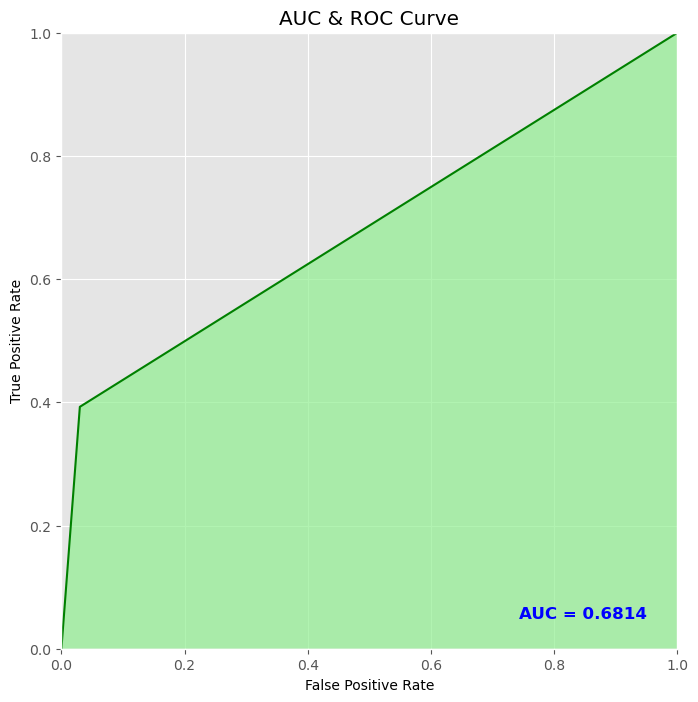

In [446]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [447]:
from sklearn.metrics import log_loss
logloss = log_loss(Y_test, logistic_reg.predict_proba(X_test))
logloss

5.0828789983478675

#  Logistic Regression with Minmax Scaler

In [ ]:
#MM

In [461]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_trainMM,Y_train)

LogisticRegression(random_state=0)

In [462]:
logistic_reg_pred=logistic_reg.predict(X_testMM)
logistic_reg_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [463]:
confusion_mat=confusion_matrix(Y_test, logistic_reg_pred)
confusion_mat

array([[909,  26],
       [119,  72]], dtype=int64)

In [464]:

### accuracy using accuracy_score
print(round(accuracy_score(Y_test, logistic_reg_pred), 2))

0.87


In [465]:
from sklearn import metrics
auc = metrics.roc_auc_score(Y_test, logistic_reg_pred)
auc

0.6745779320771621

In [466]:
from sklearn.metrics import log_loss
logloss = log_loss(Y_test, logistic_reg.predict_proba(X_test))
logloss


6.113976729415688

# 2. Linear Regression

In [467]:
# Importing MAE, rsq, MSE and liner regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [468]:
Y_train


877     0
2656    0
2598    0
1496    0
2478    0
       ..
1180    0
3441    0
1344    0
4623    1
1289    0
Name: Churn, Length: 4504, dtype: int64

In [469]:
lm = LinearRegression()
lm.fit(X_trainSS,Y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [-0.13065569  0.02182444 -0.01237782  0.0339615   0.04031566  0.04479281
  0.09154318 -0.00262559  0.00428331  0.02691935 -0.04120155 -0.00342383]


In [470]:
y_pred = lm.predict(X_trainSS)

In [471]:
r2 = r2_score(y_true=Y_train,y_pred=y_pred)
print(r2)  

0.2264843762511688


In [472]:
N=X.shape[0] # shape is 0
p=5 # number of features
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.22579668455153434


In [473]:
residuals = Y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.26206525001794e-17


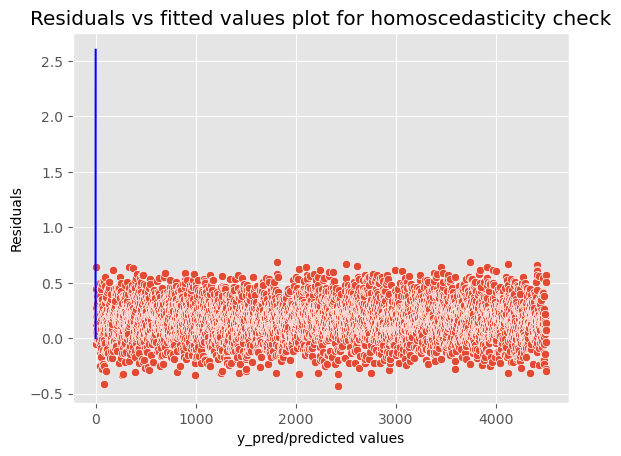

In [474]:
p = sns.scatterplot(y_pred)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,2.6],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

<Axes: xlabel='Churn', ylabel='Density'>

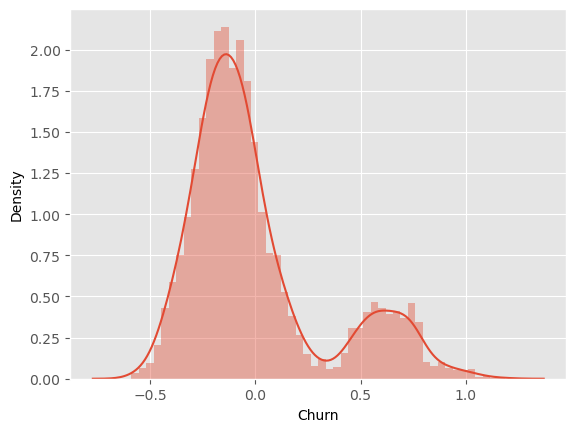

In [475]:
sns.distplot((Y_train-y_pred),bins=50)


In [476]:
predictions = lm.predict(X_test)

In [477]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 1.315407152190632
MSE: 2.799389493019403
RMSE: 1.6731376192708725


# 3. Decision Tree 

In [478]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [479]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_trainSS,Y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_testSS)

In [480]:
print(f"Decision tree training set accuracy: {format(classification.score(X_trainSS, Y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_testSS, Y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.9512 


In [481]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       935
           1       0.87      0.84      0.85       191

    accuracy                           0.95      1126
   macro avg       0.92      0.91      0.91      1126
weighted avg       0.95      0.95      0.95      1126



In [ ]:
# Decision Tree Entropy

In [483]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
classification = classification.fit(X_trainSS,Y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_testSS)

In [484]:
print(f"Decision tree training set accuracy: {format(classification.score(X_trainSS, Y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_testSS, Y_test), '.4f')} ")

Decision tree training set accuracy: 0.8808 
Decision tree testing set accuracy: 0.8774 


In [485]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       935
           1       0.69      0.50      0.58       191

    accuracy                           0.88      1126
   macro avg       0.80      0.73      0.75      1126
weighted avg       0.87      0.88      0.87      1126



# 4. SVM Model

In [487]:
#Importing SVM model
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_trainSS, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_testSS)

In [488]:
cm= confusion_matrix(Y_test, y_pred) 
cm

array([[911,  24],
       [119,  72]], dtype=int64)

In [489]:
# print prediction results
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       935
           1       0.75      0.38      0.50       191

    accuracy                           0.87      1126
   macro avg       0.82      0.68      0.71      1126
weighted avg       0.86      0.87      0.86      1126



In [ ]:
#Hyper parameter tunning

In [490]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_trainSS, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.832 total time=   1.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.832 total time=   1.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.831 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.831 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.832 total time=   1.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.839 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.832 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [491]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [492]:
#Create a svm Classifier
clf = svm.SVC(C= 100, kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_trainSS, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_testSS)

In [137]:
grid_predictions = grid.predict(X_testSS)
  
# print classification report
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       935
           1       0.85      0.75      0.80       191

    accuracy                           0.94      1126
   macro avg       0.90      0.86      0.88      1126
weighted avg       0.93      0.94      0.93      1126



In [493]:
cm= confusion_matrix(Y_test, grid_predictions) 


In [494]:
cm

array([[925,  10],
       [ 39, 152]], dtype=int64)

# We are testing 'case 2' with our machine learning models

In [515]:
case2y = new_fields.iloc[:,1] #seperate target variable from data
case2y


0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

In [510]:
main = new_fields.iloc[:,2:]
main

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Category_Male,Category_Fashion,Category_Grocery,Category_Laptop & Accessory,Category_Mobile,Category_Mobile Phone,Category_Others,Category_Divorced,Category_Married,Category_Single
0,4.0,6.0,3.0,3,2,9,1,11.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1,9.0,8.0,3.0,4,3,7,1,15.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
2,9.0,30.0,2.0,4,3,6,1,14.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
3,0.0,15.0,2.0,4,5,8,0,23.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
4,0.0,12.0,3.0,3,5,3,0,11.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2,1,6,0,18.0,1.0,2.0,...,1,0,0,1,0,0,0,0,1,0
5626,13.0,13.0,3.0,5,5,6,0,16.0,1.0,2.0,...,1,1,0,0,0,0,0,0,1,0
5627,1.0,11.0,3.0,2,4,3,1,21.0,1.0,2.0,...,1,0,0,1,0,0,0,0,1,0
5628,23.0,9.0,4.0,5,4,4,0,15.0,2.0,2.0,...,1,0,0,1,0,0,0,0,1,0


In [500]:
main.columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Category_Computer',
       'Category_Mobile Phone', 'Category_Phone', 'Category_CC',
       'Category_COD', 'Category_Cash on Delivery', 'Category_Credit Card',
       'Category_Debit Card', 'Category_E wallet', 'Category_UPI',
       'Category_Female', 'Category_Male', 'Category_Fashion',
       'Category_Grocery', 'Category_Laptop & Accessory', 'Category_Mobile',
       'Category_Mobile Phone', 'Category_Others', 'Category_Divorced',
       'Category_Married', 'Category_Single'],
      dtype='object')

In [508]:
#drop columns which has p-value less than alpha 
a = ['Tenure','WarehouseToHome','NumberOfDeviceRegistered',  'NumberOfAddress', 'OrderAmountHikeFromlastYear','DaySinceLastOrder', 'CashbackAmount']
case2x = main.drop(a,axis=1)
case2x

,HourSpendOnApp,SatisfactionScore,Complain,CouponUsed,OrderCount,Category_Computer,Category_Mobile Phone,Category_Phone,Category_CC,Category_COD,...,Category_Male,Category_Fashion,Category_Grocery,Category_Laptop & Accessory,Category_Mobile,Category_Mobile Phone,Category_Others,Category_Divorced,Category_Married,Category_Single
0,3.0,2,1,1.0,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,3.0,3,1,0.0,1.0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2.0,3,1,0.0,1.0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
3,2.0,5,0,0.0,1.0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,3.0,5,0,1.0,1.0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,3.0,1,0,1.0,2.0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5626,3.0,5,0,1.0,2.0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
5627,3.0,4,1,1.0,2.0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5628,4.0,4,0,2.0,2.0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [511]:
#tran test split
X_train,X_test,Y_train,Y_test = train_test_split(case2x,case2y, test_size = 0.2, random_state = 10)

In [513]:
X_train

,HourSpendOnApp,SatisfactionScore,Complain,CouponUsed,OrderCount,Category_Computer,Category_Mobile Phone,Category_Phone,Category_CC,Category_COD,...,Category_Male,Category_Fashion,Category_Grocery,Category_Laptop & Accessory,Category_Mobile,Category_Mobile Phone,Category_Others,Category_Divorced,Category_Married,Category_Single
877,2.0,2,0,0.0,2.0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2656,2.0,3,0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2598,3.0,4,0,1.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1496,3.0,4,0,0.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2478,2.0,4,0,1.0,1.0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,3.0,1,0,1.0,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3441,4.0,3,0,2.0,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1344,2.0,3,0,0.0,1.0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4623,4.0,1,1,1.0,2.0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [514]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape) #check the size of value to verify

(4504, 26) (1126, 26) (4504,) (1126,)


In [ ]:
#SS

In [516]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_trainSS = sc.fit_transform(X_train.iloc[:,:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_testSS= sc.transform(X_test.iloc[:,:])

In [517]:
X_trainSS

array([[-1.32832775, -0.76174868, -0.63870179, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       [-1.32832775, -0.03975456, -0.63870179, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       [ 0.08504059,  0.68223956, -0.63870179, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       ...,
       [-1.32832775, -0.03975456, -0.63870179, ..., -0.42388114,
         0.94468882, -0.6848467 ],
       [ 1.49840894, -1.4837428 ,  1.56567589, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       [-1.32832775, -0.03975456, -0.63870179, ..., -0.42388114,
        -1.05854962,  1.4601808 ]])

In [518]:
X_testSS

array([[-1.32832775,  1.40423368, -0.63870179, ..., -0.42388114,
         0.94468882, -0.6848467 ],
       [ 0.08504059, -0.03975456, -0.63870179, ..., -0.42388114,
         0.94468882, -0.6848467 ],
       [ 1.49840894, -0.03975456,  1.56567589, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       ...,
       [ 1.49840894, -1.4837428 ,  1.56567589, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       [ 1.49840894,  0.68223956, -0.63870179, ..., -0.42388114,
         0.94468882, -0.6848467 ],
       [ 0.08504059, -0.03975456,  1.56567589, ..., -0.42388114,
        -1.05854962,  1.4601808 ]])

In [ ]:
#MM

In [519]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_trainMM = sc.fit_transform(X_train.iloc[:,:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_testMM= sc.transform(X_test.iloc[:,:])

In [520]:
X_trainMM

array([[0.4 , 0.25, 0.  , ..., 0.  , 0.  , 1.  ],
       [0.4 , 0.5 , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.6 , 0.75, 0.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.4 , 0.5 , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.  , 1.  , ..., 0.  , 0.  , 1.  ],
       [0.4 , 0.5 , 0.  , ..., 0.  , 0.  , 1.  ]])

In [521]:
X_testMM

array([[0.4 , 1.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.6 , 0.5 , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.5 , 1.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.8 , 0.  , 1.  , ..., 0.  , 0.  , 1.  ],
       [0.8 , 0.75, 0.  , ..., 0.  , 1.  , 0.  ],
       [0.6 , 0.5 , 1.  , ..., 0.  , 0.  , 1.  ]])

# Macine learning Modeling

## 1. Logistic Regression

In [522]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)


In [523]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_trainSS,Y_train)

LogisticRegression(random_state=0)

In [524]:
logistic_reg_pred=logistic_reg.predict(X_testSS)
logistic_reg_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [525]:
confusion_mat=confusion_matrix(Y_test, logistic_reg_pred)
confusion_mat

array([[909,  26],
       [140,  51]], dtype=int64)

In [530]:
### accuracy using accuracy_score
print("Accuracy is ", round(accuracy_score(Y_test, logistic_reg_pred), 2))

Accuracy is  0.85


In [531]:
print("Precision Score is ", (precision_score(Y_test, logistic_reg_pred)))

Precision Score is  0.6623376623376623


In [532]:
print("Recall score is ",round(recall_score(Y_test, logistic_reg_pred), 2))

Recall score is  0.27


In [533]:
from sklearn.metrics import f1_score
print("F1 score is ",round(f1_score(Y_test, logistic_reg_pred), 2))

F1 score is  0.38


In [534]:
from sklearn import metrics
auc = metrics.roc_auc_score(Y_test, logistic_reg_pred)
auc

0.6196041100876333

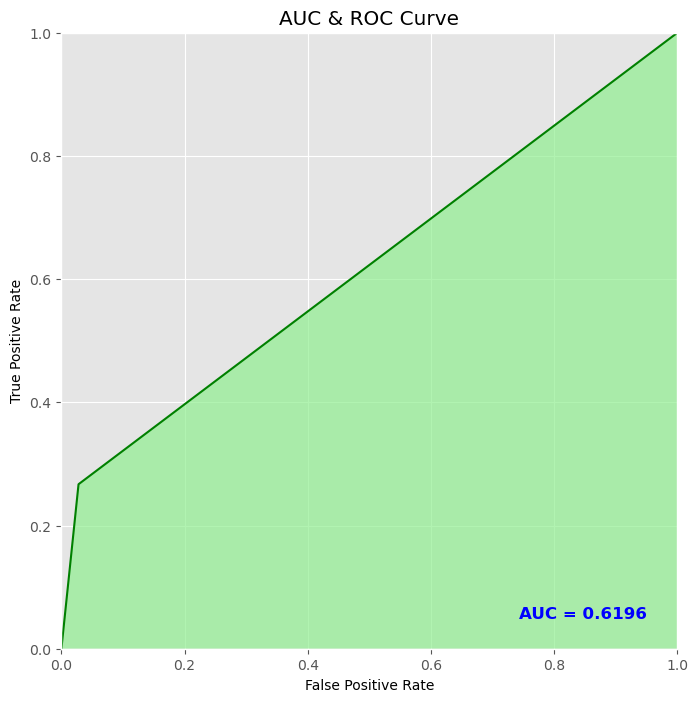

In [535]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [536]:
from sklearn.metrics import log_loss
logloss = log_loss(Y_test, logistic_reg.predict_proba(X_test))
logloss

0.5978262802204577

# Logistic Regression with MM scaler

In [544]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_trainMM,Y_train)

LogisticRegression(random_state=0)

In [545]:
logistic_reg_pred=logistic_reg.predict(X_testMM)
logistic_reg_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [546]:
confusion_mat=confusion_matrix(Y_test, logistic_reg_pred)
confusion_mat

array([[913,  22],
       [140,  51]], dtype=int64)

In [547]:

### accuracy using accuracy_score
print(round(accuracy_score(Y_test, logistic_reg_pred), 2))

0.86


In [554]:
print(round(precision_score(Y_test, logistic_reg_pred),2))

0.7


In [549]:
print(round(recall_score(Y_test, logistic_reg_pred), 2))

0.27


In [556]:
from sklearn import metrics
auc = metrics.roc_auc_score(Y_test, logistic_reg_pred)
auc

0.6217431475207884

# 2. Linear Regression 

In [557]:
# Importing MAE, rsq, MSE and liner regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [558]:
Y_train

877     0
2656    0
2598    0
1496    0
2478    0
       ..
1180    0
3441    0
1344    0
4623    1
1289    0
Name: Churn, Length: 4504, dtype: int64

In [559]:
lm = LinearRegression()
lm.fit(X_trainSS,Y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [ 2.83095218e-03  4.30482052e-02  9.73083630e-02  7.61154001e-03
  8.21041004e-03 -3.18488885e+11 -3.50865327e+11 -2.91406292e+11
  1.01273453e+12  1.18838024e+12  7.92096511e+11  2.12693359e+12
  2.35978875e+12  1.50369461e+12  1.26553142e+12 -1.66799312e+12
 -1.66799312e+12  1.20713283e+12  8.91583480e+11  1.64977931e+12
  1.19475014e+12  1.43705799e+12  7.25660713e+11  5.92463907e+12
  8.23090545e+12  7.68683212e+12]


In [560]:
y_pred = lm.predict(X_trainSS)

In [561]:
r2 = r2_score(y_true=Y_train,y_pred=y_pred)
print(r2)  

0.17078081398984768


In [562]:
N=X.shape[0] # shape is 0
p=5 # number of features
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.17004359920854428


In [563]:
residuals = Y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.00025937658863717754


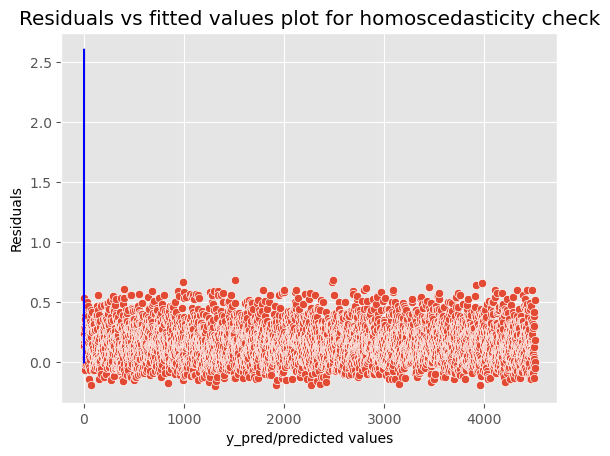

In [564]:
p = sns.scatterplot(y_pred)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,2.6],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


In [565]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 1.315407152190632
MSE: 2.799389493019403
RMSE: 1.6731376192708725


# 3. Decision Tree

In [566]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [567]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_trainSS,Y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_testSS)

In [568]:
print(f"Decision tree training set accuracy: {format(classification.score(X_trainSS, Y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_testSS, Y_test), '.4f')} ")

Decision tree training set accuracy: 0.9858 
Decision tree testing set accuracy: 0.8872 


In [570]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       935
           1       0.68      0.64      0.66       191

    accuracy                           0.89      1126
   macro avg       0.80      0.79      0.80      1126
weighted avg       0.88      0.89      0.89      1126



In [571]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
classification = classification.fit(X_trainSS,Y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_testSS)

In [572]:
print(f"Decision tree training set accuracy: {format(classification.score(X_trainSS, Y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_testSS, Y_test), '.4f')} ")

Decision tree training set accuracy: 0.8433 
Decision tree testing set accuracy: 0.8401 


In [573]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       935
           1       0.57      0.23      0.32       191

    accuracy                           0.84      1126
   macro avg       0.72      0.60      0.62      1126
weighted avg       0.81      0.84      0.81      1126



# 4. SVM Model

In [574]:
#Importing SVM model
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_trainSS, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_testSS)

In [575]:
cm= confusion_matrix(Y_test, y_pred) 
cm

array([[935,   0],
       [191,   0]], dtype=int64)

In [576]:
# print prediction results
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       935
           1       0.00      0.00      0.00       191

    accuracy                           0.83      1126
   macro avg       0.42      0.50      0.45      1126
weighted avg       0.69      0.83      0.75      1126



In [ ]:
#Hyper Tunning 

In [196]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_trainSS, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.832 total time=   1.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.832 total time=   1.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.831 total time=   1.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.831 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.832 total time=   1.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.831 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.831 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.832 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [577]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [578]:
#Create a svm Classifier
clf = svm.SVC(C= 100, kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_trainSS, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_testSS)

In [579]:
grid_predictions = grid.predict(X_testSS)
  
# print classification report
print(classification_report(Y_test, grid_predictions))

ValueError: X has 26 features, but SVC is expecting 12 features as input.

In [201]:
cm= confusion_matrix(Y_test, grid_predictions) 
cm


array([[903,  32],
       [ 86, 105]], dtype=int64)

# We are testing 'case 2' with our machine learning models

In [ ]:
case3=dfc.iloc[:,15:]
case3

In [286]:
case3x = case3.iloc[:,1:]
case3x

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Category_Male,Category_Fashion,Category_Grocery,Category_Laptop & Accessory,Category_Mobile,Category_Mobile Phone,Category_Others,Category_Divorced,Category_Married,Category_Single
0,4.0,6.0,3.0,3,2,9,1,11.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1,9.0,8.0,3.0,4,3,7,1,15.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
2,9.0,30.0,2.0,4,3,6,1,14.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
3,0.0,15.0,2.0,4,5,8,0,23.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
4,0.0,12.0,3.0,3,5,3,0,11.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2,1,6,0,18.0,1.0,2.0,...,1,0,0,1,0,0,0,0,1,0
5626,13.0,13.0,3.0,5,5,6,0,16.0,1.0,2.0,...,1,1,0,0,0,0,0,0,1,0
5627,1.0,11.0,3.0,2,4,3,1,21.0,1.0,2.0,...,1,0,0,1,0,0,0,0,1,0
5628,23.0,9.0,4.0,5,4,4,0,15.0,2.0,2.0,...,1,0,0,1,0,0,0,0,1,0


In [287]:
case3y = case3.iloc[:,0]
case3y

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

In [288]:
X_train,X_test,Y_train,Y_test = train_test_split(case3x,case3y, test_size = 0.2, random_state = 10)

In [289]:
X_train

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Category_Male,Category_Fashion,Category_Grocery,Category_Laptop & Accessory,Category_Mobile,Category_Mobile Phone,Category_Others,Category_Divorced,Category_Married,Category_Single
877,8.0,24.0,2.0,3,2,3,0,11.0,0.0,2.0,...,1,1,0,0,0,0,0,0,0,1
2656,9.0,20.0,2.0,3,3,2,0,16.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,1
2598,6.0,8.0,3.0,3,4,9,0,15.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1496,8.0,6.0,3.0,3,4,2,0,13.0,0.0,1.0,...,1,1,0,0,0,0,0,0,1,0
2478,16.0,33.0,2.0,1,4,6,0,12.0,1.0,1.0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,27.0,13.0,3.0,3,1,5,0,15.0,1.0,1.0,...,0,0,0,1,0,0,0,0,1,0
3441,24.0,7.0,4.0,4,3,2,0,13.0,2.0,2.0,...,0,0,0,1,0,0,0,1,0,0
1344,7.0,14.0,2.0,1,3,3,0,12.0,0.0,1.0,...,1,0,0,1,0,0,0,0,1,0
4623,1.0,31.0,4.0,6,1,3,1,19.0,1.0,2.0,...,1,0,0,0,0,1,0,0,0,1


In [292]:
Y_train

877     0
2656    0
2598    0
1496    0
2478    0
       ..
1180    0
3441    0
1344    0
4623    1
1289    0
Name: Churn, Length: 4504, dtype: int64

In [293]:
X_test

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Category_Male,Category_Fashion,Category_Grocery,Category_Laptop & Accessory,Category_Mobile,Category_Mobile Phone,Category_Others,Category_Divorced,Category_Married,Category_Single
1906,25.0,9.0,2.0,4,5,2,0,11.0,1.0,1.0,...,1,0,1,0,0,0,0,0,1,0
5318,11.0,26.0,3.0,4,3,5,0,18.0,1.0,2.0,...,1,0,0,1,0,0,0,0,1,0
4397,26.0,9.0,4.0,5,3,3,1,15.0,2.0,16.0,...,1,0,0,0,0,0,1,0,0,1
4301,19.0,36.0,3.0,4,1,7,0,14.0,2.0,2.0,...,1,0,0,0,0,1,0,0,0,1
4141,12.0,17.0,4.0,4,1,3,0,12.0,1.0,2.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,0.0,9.0,3.0,3,5,6,0,13.0,1.0,1.0,...,1,0,0,0,0,1,0,0,1,0
494,6.0,6.0,2.0,1,5,2,0,22.0,0.0,1.0,...,1,0,0,1,0,0,0,0,1,0
3905,9.0,9.0,4.0,5,1,2,1,15.0,2.0,2.0,...,1,0,0,0,0,1,0,0,0,1
5458,10.0,28.0,4.0,4,4,6,0,23.0,4.0,4.0,...,0,0,0,1,0,0,0,0,1,0


In [294]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape) #check the size of value to verify

(4504, 33) (1126, 33) (4504,) (1126,)


In [ ]:
#SS

In [295]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_trainSS = sc.fit_transform(X_train.iloc[:,:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_testSS= sc.transform(X_test.iloc[:,:])

In [296]:
X_trainSS

array([[-0.25858401,  1.05737701, -1.32832775, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       [-0.13819302,  0.55985281, -1.32832775, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       [-0.49936597, -0.93271981,  0.08504059, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       ...,
       [-0.37897499, -0.1864335 , -1.32832775, ..., -0.42388114,
         0.94468882, -0.6848467 ],
       [-1.10132088,  1.92804437,  1.49840894, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       [ 1.18610778,  1.92804437, -1.32832775, ..., -0.42388114,
        -1.05854962,  1.4601808 ]])

In [297]:
X_testSS

array([[ 1.78806269, -0.80833875, -1.32832775, ..., -0.42388114,
         0.94468882, -0.6848467 ],
       [ 0.10258894,  1.30613912,  0.08504059, ..., -0.42388114,
         0.94468882, -0.6848467 ],
       [ 1.90845368, -0.80833875,  1.49840894, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       ...,
       [-0.13819302, -0.80833875,  1.49840894, ..., -0.42388114,
        -1.05854962,  1.4601808 ],
       [-0.01780204,  1.55490122,  1.49840894, ..., -0.42388114,
         0.94468882, -0.6848467 ],
       [-1.10132088, -0.4351956 ,  0.08504059, ..., -0.42388114,
        -1.05854962,  1.4601808 ]])

In [ ]:
#MM

In [298]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_trainMM = sc.fit_transform(X_train.iloc[:,:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_testMM= sc.transform(X_test.iloc[:,:])

In [299]:
X_trainMM

array([[0.25806452, 0.61290323, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.29032258, 0.48387097, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.19354839, 0.09677419, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.22580645, 0.29032258, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.03225806, 0.83870968, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.64516129, 0.83870968, 0.4       , ..., 0.        , 0.        ,
        1.        ]])

In [300]:
X_testMM

array([[0.80645161, 0.12903226, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.35483871, 0.67741935, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.83870968, 0.12903226, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.29032258, 0.12903226, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.32258065, 0.74193548, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.03225806, 0.22580645, 0.6       , ..., 0.        , 0.        ,
        1.        ]])

# Machine learning Models

## 1. Logistic Regression

In [301]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)


In [302]:
 Y_train

877     0
2656    0
2598    0
1496    0
2478    0
       ..
1180    0
3441    0
1344    0
4623    1
1289    0
Name: Churn, Length: 4504, dtype: int64

In [303]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_trainSS,Y_train)

LogisticRegression(random_state=0)

In [304]:
logistic_reg_pred=logistic_reg.predict(X_testSS)
logistic_reg_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [305]:

Y_test

1906    0
5318    0
4397    0
4301    0
4141    0
       ..
1750    1
494     0
3905    0
5458    1
4523    1
Name: Churn, Length: 1126, dtype: int64

In [306]:
confusion_mat=confusion_matrix(Y_test, logistic_reg_pred)
confusion_mat

array([[895,  40],
       [ 85, 106]], dtype=int64)

In [307]:
### accuracy using accuracy_score
print(round(accuracy_score(Y_test, logistic_reg_pred), 2))

0.89


In [308]:
print((precision_score(Y_test, logistic_reg_pred)))

0.726027397260274


In [309]:
print(round(recall_score(Y_test, logistic_reg_pred), 2))

0.55


In [310]:
from sklearn.metrics import f1_score
print(round(f1_score(Y_test, logistic_reg_pred), 2))

0.63


In [311]:
from sklearn import metrics
auc = metrics.roc_auc_score(Y_test, logistic_reg_pred)
auc

0.7560965366632136

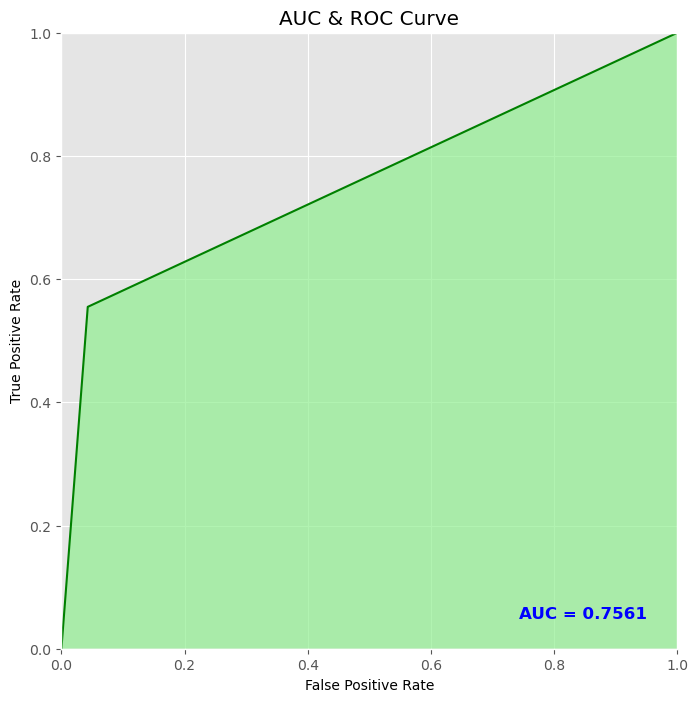

In [312]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [314]:
from sklearn.metrics import log_loss
logloss = log_loss(Y_test, logistic_reg.predict_proba(X_test))
logloss

6.113976739053353

# Logistic Regression with MM

In [315]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_trainMM,Y_train)

LogisticRegression(random_state=0)

In [316]:
confusion_mat=confusion_matrix(Y_test, logistic_reg_pred)
confusion_mat

array([[895,  40],
       [ 85, 106]], dtype=int64)

In [317]:

### accuracy using accuracy_score
print(round(accuracy_score(Y_test, logistic_reg_pred), 2))

0.89


In [318]:
from sklearn import metrics
auc = metrics.roc_auc_score(Y_test, logistic_reg_pred)
auc

0.7560965366632136

In [319]:
from sklearn.metrics import log_loss
logloss = log_loss(Y_test, logistic_reg.predict_proba(X_test))
logloss


6.113976729415419

## 2. Linear Regression 

In [320]:
# Importing MAE, rsq, MSE and liner regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [321]:
Y_train

877     0
2656    0
2598    0
1496    0
2478    0
       ..
1180    0
3441    0
1344    0
4623    1
1289    0
Name: Churn, Length: 4504, dtype: int64

In [326]:
lm = LinearRegression()
lm.fit(X_trainSS,Y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [-1.28077639e-01  2.50515612e-02 -4.51600384e-03  3.56532509e-02
  3.91554856e-02  5.40903872e-02  9.31063000e-02 -7.25057867e-04
  5.91370494e-03  2.45191843e-02 -3.03542017e-02 -6.00269554e-02
  6.28652687e+11  6.92559272e+11  5.75195421e+11 -1.24109914e+11
 -1.45635174e+11 -9.70708781e+10 -2.60654236e+11 -2.89190474e+11
 -1.84276732e+11 -1.55089998e+11 -2.69526235e+11 -2.69526235e+11
  9.91783514e+10  7.32527334e+10  1.35546302e+11  9.81609856e+10
  1.18069063e+11  5.96204752e+10 -7.09948824e+10 -9.86308461e+10
 -9.21112216e+10]


In [327]:
y_pred = lm.predict(X_trainSS)

In [328]:
r2 = r2_score(y_true=Y_train,y_pred=y_pred)
print(r2)  

0.2837719464553272


In [329]:
N=X.shape[0] # shape is 0
p=5 # number of features
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.28313518609477906


In [330]:
residuals = Y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 3.5693934440635836e-05


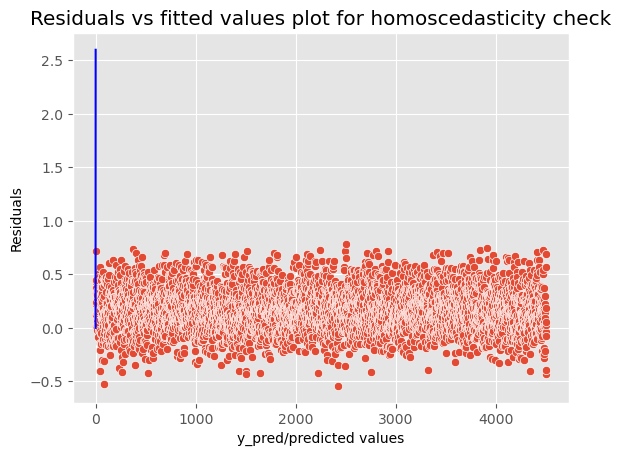

In [331]:
p = sns.scatterplot(y_pred)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,2.6],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [332]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 1.3137761638430459
MSE: 2.7941493335869905
RMSE: 1.6715709179053668


## 3.Decision Tree

In [333]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [334]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_trainSS,Y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_testSS)

In [335]:
print(f"Decision tree training set accuracy: {format(classification.score(X_trainSS, Y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_testSS, Y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.9663 


In [336]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       935
           1       0.89      0.91      0.90       191

    accuracy                           0.97      1126
   macro avg       0.94      0.94      0.94      1126
weighted avg       0.97      0.97      0.97      1126



In [ ]:
# Decision Tree With entropy

In [337]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
classification = classification.fit(X_trainSS,Y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_testSS)

In [338]:
print(f"Decision tree training set accuracy: {format(classification.score(X_trainSS, Y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_testSS, Y_test), '.4f')} ")

Decision tree training set accuracy: 0.8808 
Decision tree testing set accuracy: 0.8774 


In [339]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       935
           1       0.69      0.50      0.58       191

    accuracy                           0.88      1126
   macro avg       0.80      0.73      0.75      1126
weighted avg       0.87      0.88      0.87      1126



# 4. SVM Model

In [340]:
#Importing SVM model
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_trainSS, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_testSS)

In [341]:
cm= confusion_matrix(Y_test, y_pred) 
cm

array([[904,  31],
       [ 92,  99]], dtype=int64)

In [342]:
# print prediction results
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       935
           1       0.76      0.52      0.62       191

    accuracy                           0.89      1126
   macro avg       0.83      0.74      0.78      1126
weighted avg       0.88      0.89      0.88      1126



In [ ]:
# Hyper tunning 

In [343]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_trainSS, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.832 total time=   1.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.832 total time=   1.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.831 total time=   1.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.831 total time=   1.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.832 total time=   1.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=   1.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.831 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.831 total time=   1.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.832 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [344]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [345]:
#Create a svm Classifier
clf = svm.SVC(C= 100, kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_trainSS, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_testSS)

In [346]:
grid_predictions = grid.predict(X_testSS)
  
# print classification report
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       935
           1       0.94      0.80      0.86       191

    accuracy                           0.96      1126
   macro avg       0.95      0.89      0.92      1126
weighted avg       0.96      0.96      0.96      1126



# Summary 

In the report provided below, we delve into the metrics of three distinct cases employing four machine learning models: Logistic Regression, Linear Regression, Decision Tree, and Support Vector Machine (SVM). The primary objective of our analysis revolves around predicting customer churn, a critical task in customer retention and business sustainability.

The selection of these specific models is strategic, driven by the nature of our predictive task. As we aim to forecast customer churn, a binary classification problem, leveraging classification models becomes imperative. Each of the chosen models brings its unique approach to tackling classification tasks, offering a diverse set of methodologies to explore and compare.

Through meticulous examination and evaluation of these models across various scenarios, we aim to gain a comprehensive understanding of their performance and effectiveness in predicting customer churn. By scrutinizing metrics such as accuracy, precision, recall, F1-score, and others, we can ascertain the model's ability to correctly classify churn and non-churn instances.



In [590]:
#to get data
report = pd.read_excel('BA_Assignment_Part_1_dataset.xlsx', sheet_name="Summary")
report.fillna(0, inplace = True)
report

,fields,casename,Accuracy,pre,recall,f1,AUC,R2,adjusted r2,Mean of Residual,MAE,MSE,RMSE,Training,Test
0,part 1+ part2,case1_logistic_reg_SS,87.0,72.8,39.0,51.0,68.00,0.0000,0.0000,0.000000,0.000,0.00,0.00,0.0000,0.0000
1,part 1+ part2,case1_logistic_reg_MM,87.0,72.8,39.0,51.0,67.45,0.0000,0.0000,0.000000,0.000,0.00,0.00,0.0000,0.0000
2,part 1+ part 2,case1_linear_reg,0.0,0.0,0.0,0.0,0.00,0.2264,0.2257,1.500000,1.313,2.79,1.67,0.0000,0.0000
3,part 1+ part2,case1_DT_0,95.0,97.0,97.0,97.0,0.00,0.0000,0.0000,0.000000,0.000,0.00,0.00,1.0000,0.9400
4,part 1+ part2,case1_DT_1,0.0,86.0,84.0,85.0,0.00,0.0000,0.0000,0.000000,0.000,0.00,0.00,0.0000,0.0000
5,part 1+ part2,case1_DT_entropy_0,88.0,90.0,96.0,93.0,0.00,0.0000,0.0000,0.000000,0.000,0.00,0.00,88.0000,87.0000
6,part 1+ part2,case1_DT_entropy_1,0.0,69.0,50.0,58.0,0.00,0.0000,0.0000,0.000000,0.000,0.00,0.00,0.0000,0.0000
7,part 1+ part2,case1_SVM_0,87.0,89.0,97.0,93.0,0.00,0.0000,0.0000,0.000000,0.000,0.00,0.00,0.0000,0.0000
8,part 1+ part2,case1_SVM_1,0.0,75.0,38.0,51.0,0.00,0.0000,0.0000,0.000000,0.000,0.00,0.00,0.0000,0.0000
9,part 1+ part2,case1_svm_hypertunning_0,94.0,95.0,97.0,96.0,0.00,0.0000,0.0000,0.000000,0.000,0.00,0.00,0.0000,0.0000


# In our analysis, we have explored three distinct cases utilizing four different machine learning models. Each case presents unique insights into the predictive performance of these models. 

Of particular note is Case 3, which exhibited consistently high performance across all machine learning models. However, during our hypothesis testing phase, we uncovered that certain features within Case 3 yielded p-values approaching zero. This finding led us to question the suitability of Case 3 for our predictive modeling purposes.

As a result, we have reached the conclusion that Case 1, employing the Decision Tree model with Entropy criterion, demonstrates the highest recall score among all cases. Consequently, we consider the Decision Tree model from Case 1 as the most optimal choice for our predictive modeling task.

It is noteworthy that Case 1 encompasses all relevant fields except for categorical variables, which include 'Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', and 'CashbackAmount'. These categorical fields were excluded from Case 1's analysis.